In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import requests
import json
from config import api_key

In [2]:
api_key = "3b3e1d7845d02897a766921cd3808fa3"

In [3]:
#Build query URl

units="imperial"

In [4]:
lat1=[]
temp1=[]
city1=[]


latitude_n=[0,1,2,4,6,8]
for y in latitude_n:
    bbox=f'12,{y},15,{y+7},20'
    url2 = "http://api.openweathermap.org/data/2.5/box/city?bbox="
    query_url2 = f'{url2}{bbox}&appid={api_key}&units={units}'
    print(query_url2)
    
    response = requests.get(query_url2)
    response_json = response.json()

http://api.openweathermap.org/data/2.5/box/city?bbox=12,0,15,7,20&appid=3b3e1d7845d02897a766921cd3808fa3&units=imperial
http://api.openweathermap.org/data/2.5/box/city?bbox=12,1,15,8,20&appid=3b3e1d7845d02897a766921cd3808fa3&units=imperial
http://api.openweathermap.org/data/2.5/box/city?bbox=12,2,15,9,20&appid=3b3e1d7845d02897a766921cd3808fa3&units=imperial
http://api.openweathermap.org/data/2.5/box/city?bbox=12,4,15,11,20&appid=3b3e1d7845d02897a766921cd3808fa3&units=imperial
http://api.openweathermap.org/data/2.5/box/city?bbox=12,6,15,13,20&appid=3b3e1d7845d02897a766921cd3808fa3&units=imperial
http://api.openweathermap.org/data/2.5/box/city?bbox=12,8,15,15,20&appid=3b3e1d7845d02897a766921cd3808fa3&units=imperial


In [6]:
#response = requests.get(query_url2)
#response_json = response.json()


for x in response_json['list']:
        lat1.append(x['coord']['Lat'])
        temp1.append(x['main']['temp'])
        city1.append(x['name'])


In [7]:
templ1_dict={"city":city1,
            "lat":lat1,
            "temp":temp1}
templ1_dict=pd.DataFrame(templ1_dict)
templ1_dict

,city,lat,temp
0,Bama,11.5221,62.76
1,Gwoza,11.1036,65.12
2,Maiduguri,11.8464,67.93
3,Dikwa,12.0240,68.97
4,Mora,11.0461,63.27
5,Damboa,11.1560,67.17
6,Mokolo,10.7398,66.29
7,Magumeri,12.1131,68.27
8,Marte,12.3611,70.83
9,Gamboru,12.3707,70.25


In [10]:
latitude_s=[-8,-6,-4,-2]
for y in latitude_s:
    bbox=f'12,{y},15,{y+7},20'
    url3 = "http://api.openweathermap.org/data/2.5/box/city?bbox="
    query_url3 = f'{url3}{bbox}&appid={api_key}&units={units}'
    print(query_url3)
    

http://api.openweathermap.org/data/2.5/box/city?bbox=12,-8,15,-1,20&appid=3b3e1d7845d02897a766921cd3808fa3&units=imperial
http://api.openweathermap.org/data/2.5/box/city?bbox=12,-6,15,1,20&appid=3b3e1d7845d02897a766921cd3808fa3&units=imperial
http://api.openweathermap.org/data/2.5/box/city?bbox=12,-4,15,3,20&appid=3b3e1d7845d02897a766921cd3808fa3&units=imperial
http://api.openweathermap.org/data/2.5/box/city?bbox=12,-2,15,5,20&appid=3b3e1d7845d02897a766921cd3808fa3&units=imperial


In [11]:
response2 = requests.get(query_url3)
response_json2 = response2.json()

lat2=[]
temp2=[]
city2=[]

for x in response_json2['list']:
        lat2.append(x['coord']['Lat'])
        temp2.append(x['main']['temp'])
        city2.append(x['name'])

In [12]:
templ2_dict={"city":city2,
            "lat":lat2,
            "temp":temp2}
templ2_dict=pd.DataFrame(templ2_dict)
templ2_dict

,city,lat,temp
0,Akonolinga,3.7667,71.15
1,Koulamoutou,-1.1303,69.10
2,Batouri,4.4333,61.99
3,Moanda,-1.5575,67.98
4,Bertoua,4.5833,59.47
5,Franceville,-1.6333,68.43
6,Nkoteng,4.5167,72.75
7,Nanga Eboko,4.6833,71.87
8,Bélabo,4.9333,59.92


In [14]:
templ=templ1_dict.append(templ2_dict, ignore_index = True) 

In [15]:
templ

,city,lat,temp
0,Bama,11.5221,62.76
1,Gwoza,11.1036,65.12
2,Maiduguri,11.8464,67.93
3,Dikwa,12.0240,68.97
4,Mora,11.0461,63.27
5,Damboa,11.1560,67.17
6,Mokolo,10.7398,66.29
7,Magumeri,12.1131,68.27
8,Marte,12.3611,70.83
9,Gamboru,12.3707,70.25


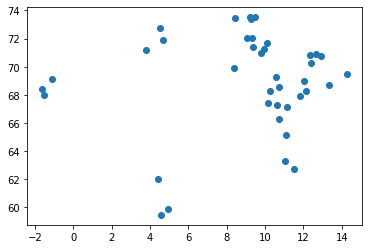

In [16]:
plt.scatter(templ['lat'],templ['temp'])